<a href="https://colab.research.google.com/github/SOhrendorf/KI/blob/master/KI_Bilder_mit_KI_identifizieren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## So sehen die Bilder in unserem Datenset aus
![Bilder der Kleidung](https://tensorflow.org/images/fashion-mnist-sprite.png)

# So sind die Labels des Datensets definiert
0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [2]:
#in diesem Abschnitt beginnen wir mit dem Einladen der Libraries
import tensorflow as tf 
import numpy as np

#in diesem Abschnitt laden wir die Daten (Bilder und Labels) aus der Datenbank "Mnist Fashion" ein
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#in diesem Abschnitt formen wir unsere Daten so um, dass unser neuronales Netz mit den Daten arbeiten kann
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

#in diesem Abschnitt "bauen" wir uns neuronales Netz
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#in diesem Abschnitt trainieren wir unser neuronales Netz
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images,training_labels, epochs=4)




4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/4
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4967 - accuracy: 0.8274
Epoch 2/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3793 - accuracy: 0.8650
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.8773
Epoch 4/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3121 - accuracy: 0.8859


#Hier könnt ihr Bilder einladen
Da das neuronale Netz relativ einfach ist, ist die Klassifzierung noch relativ schlecht.

Außerdem ist mir ein Fehler unterlaufen. Ich habe fälschlicherweise im Video gesagt, dass ihr bei der Kategorie +1 rechnen müsst. Das stimmt allerdings nicht. Unten wird die bestimmte Klasse ausgegeben.

Phil hat außerdem noch den Code gepimpt, sodass Bilder mit einem weißen Hintergrund automatisch invertiert werden, was für unser neuronales Netz wichtig ist.

Saving maenner-pullover-zoom.jpg to maenner-pullover-zoom (1).jpg
top left pixel value: 255
needs to be inverted!


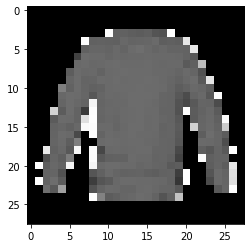

1/1 [==============================] - 0s 86ms/step


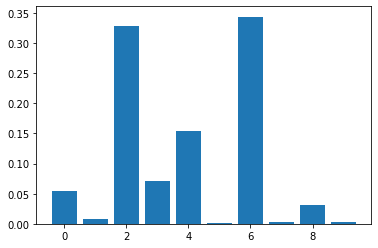

prediction: class 6


In [3]:
#in diesem Abschnitt laden wir die Libraries ein
import numpy as np
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  #in diesem Abschnitt laden wir die Bilder rein; wir nutzen eine for Schleife, um mehrere Daten gleichzeitig einladen zu können 
  path = '/content/' + fn
  img = cv2.imread(path) 
  
  #in diesem Abschnitt formartieren wir unsere Bilder, sodass sie zu unserem neuronalen Netz passen
  img = cv2.resize(img,(28,28))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  x = img
  print("top left pixel value:", x[0,0])
  if x[0,0] > 250:
    # white background
    print("needs to be inverted!")
    x -= 255
  x = x / 255.0
  x = x.reshape(1, 28, 28, 1)
  plt.imshow(img, cmap='Greys_r')
  plt.show()  
  
  #in diesem Abschnitt lassen wir unser neuronales Netz einschätzen, um welches Kleidungsstück es sich handelt; Bedenkt, dass Python ab 0 zählt, somit müsst ihr bei der ausgegebenen Zahl +1 rechnen
  classes = model.predict(x)
  plt.bar(range(10), classes[0])
  plt.show()
  print("prediction: class", np.argmax(classes[0]))
  